In [ ]:
import math 
import matplotlib.pyplot as plt
import numpy as np

(22, 2)
(68, 2)
1.2049854071503838
4.042314473899821


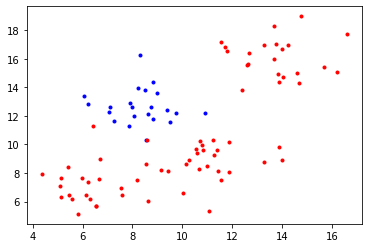

In [ ]:
[X_train, y_train, X_test, y_test] = np.load("TP4.npy",allow_pickle=True)
#C0
C0_train = X_train[np.where(y_train==0),:][0]
C0_test = X_test[np.where(y_test==0),:]
C0_ecart_type_max = max(np.std(C0_train[:,0]),np.std(C0_train[:,1]))

#C1
C1_train = X_train[np.where(y_train==1),:][0]
C1_test = X_test[np.where(y_test==1),:][0]
C1_ecart_type_max = max(np.std(C1_train[:,0]),np.std(C1_train[:,1]))

print(np.shape(C0_train))
print(np.shape(C1_train))
print(C0_ecart_type_max)
print(C1_ecart_type_max)

plt.plot(C0_train[:,0], C0_train[:,1], '.b')
plt.plot(C1_train[:,0], C1_train[:,1], '.r')
plt.show()

In [ ]:
def norm2(x, m, cov):
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p = 1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p

In [ ]:
def ddp_parzen(x, X, Cov):
  return sum(norm2(x,Xi,Cov) for Xi in X) / len(X)

In [ ]:
Cov0 = np.identity(2)*C0_ecart_type_max
Cov1 = np.identity(2)*C1_ecart_type_max

print(ddp_parzen(C1_test[0],C1_train,Cov1))
print(np.shape(C1_test[0]))

0.017070778263504185
(2,)


In [ ]:
x = np.linspace(1, 20,3)
y = np.linspace(1, 20,3)
np.array(np.meshgrid(x, y)).T.reshape(-1, 2)


array([[ 1. ,  1. ],
       [ 1. , 10.5],
       [ 1. , 20. ],
       [10.5,  1. ],
       [10.5, 10.5],
       [10.5, 20. ],
       [20. ,  1. ],
       [20. , 10.5],
       [20. , 20. ]])

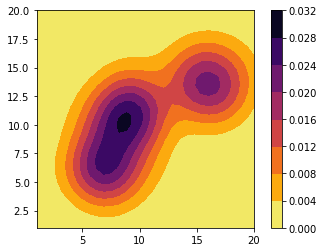

In [ ]:
x = np.linspace(1, 20,30)
y = np.linspace(1, 20,30)
xx,yy = np.meshgrid(x, y,sparse=True)
p0 = [ [ddp_parzen([yyyy,xxxx],C0_train,Cov0) for xxxx in xxx for yyyy in yyy ] for xxx in xx  for yyy in yy]
p1 = [ [ddp_parzen([yyyy,xxxx],C1_train,Cov1) for xxxx in xxx for yyyy in yyy ] for xxx in xx  for yyy in yy]

h0 = plt.contourf(x, y, p0,cmap= 'inferno_r')
h1 = plt.contourf(x, y, p1,cmap= 'inferno_r')

plt.axis('scaled')
plt.colorbar()
plt.show()